# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
df = pd.DataFrame(np.random.randint(1,7,size=(10, 1)), columns=["Dice"])
df

,Dice
0,1
1,2
2,5
3,1
4,5
5,3
6,6
7,1
8,5
9,2


#### 2.- Plot the results sorted by value.

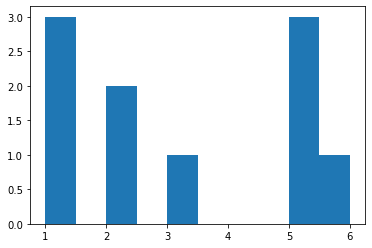

In [3]:
# your code here
plt.hist(df['Dice'])
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

      Freq
Dice      
1        3
5        3
2        2
3        1
6        1


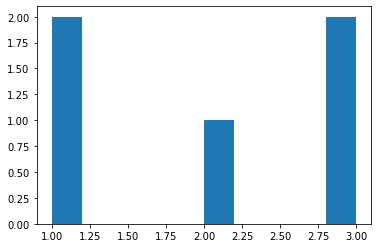

In [4]:
# your code here
db = pd.DataFrame(df.value_counts())
db.columns = ['Freq']
print(db)
plt.hist(db['Freq'])
plt.show()



In [5]:
"""
The first one (df) shows how many times we got the same result from the dice while the second one (db) counts the repetitions in df. 

"""

'\nThe first one (df) shows how many times we got the same result from the dice while the second one (db) counts the repetitions in df. \n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def mean(x):
    total = 0
    length = 0
    for element in x:
        total += element 
        length += 1
    
    mean = total/length
    return mean

mean(df["Dice"])

3.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# Since I have all the info in the previous cells, I just mix it (frequency distribution from the Challenge 1 and my function from the previous exercise)
db = pd.DataFrame(df.value_counts())
db.columns = ['Freq']
mean(db["Freq"])

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# Function and trials 
numbers = db['Freq'].to_list()
print(sorted(numbers))
def median(lst):
    n = len(lst)
    s = sorted(lst)
    if n%2 == 0:
        x = (s[n//2]/2)+(s[(n-1)//2]/2)
    else:
        x = s[(n)//2]     
    return x

median(numbers)

[1, 1, 2, 3, 3]


2

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here
def quartiles (lst):
    a = median(lst)
    x = len(lst)
    S = sorted(lst)
    if x%2 == 0:
        B = S[:x//2]
        C = S[x//2:]
    else:
        B = S[:(x+1)//2]
        C = S[x//2:]
    b = median(B)
    c = median(C)
    print(C)
    print(B)
    return a,b,c

quartiles(numbers)



[2, 3, 3]
[1, 1, 2]


(2, 1, 3)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


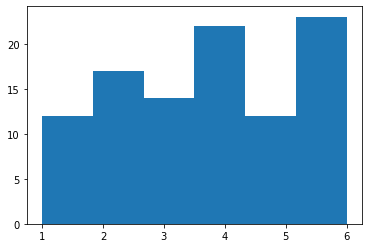

In [10]:
# your code here
data = pd.read_csv("roll_the_dice_hundred.csv")
display(data)
plt.hist(data["value"], bins = 6)
plt.show()

In [11]:
"""
I'd have expected more similar results for all the 6 values
"""

"\nI'd have expected more similar results for all the 6 values\n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [12]:
# your code here
mean(data["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [13]:
# your code here
FD = pd.DataFrame(data["value"].value_counts())
FD.columns = ['Freq']
print(FD)



   Freq
6    23
4    22
2    17
3    14
1    12
5    12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

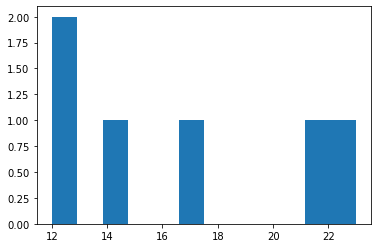

In [14]:
# your code here
plt.hist(FD, bins = 12)
plt.show()

In [15]:
"""
Here I see that 3 values had more or less similar appearances (2 of them, directly the same) while there are 2 that appears to form another different group
This last group is formed by the the appearances of the values 4 and 6. It means that these numbers appeared more than the others by quite a big margin.
That's why the obtained mean is 3.74 and not 3.5 (the mean of a dice)
"""

"\nHere I see that 3 values had more or less similar appearances (2 of them, directly the same) while there are 2 that appears to form another different group\nThis last group is formed by the the appearances of the values 4 and 6. It means that these numbers appeared more than the others by quite a big margin.\nThat's why the obtained mean is 3.74 and not 3.5 (the mean of a dice)\n"

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


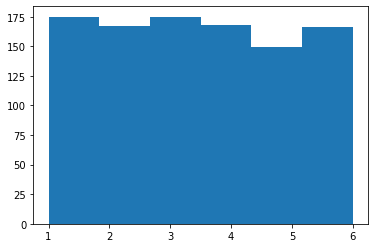

In [16]:
# your code here
data2 = pd.read_csv("roll_the_dice_thousand.csv")
display(data2)
plt.hist(data2["value"], bins = 6)
plt.show()

In [17]:
"""
By looking at the chart, it seems to be more equilibrated than the previous.
It may be because of having 10x the values.
"""

'\nBy looking at the chart, it seems to be more equilibrated than the previous.\nIt may be because of having 10x the values.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

,Freq
observation,
1.0,2
2.0,2
4.0,1
5.0,2
6.0,2
...,...
69.0,1
70.0,1
71.0,1


<AxesSubplot:xlabel='observation'>

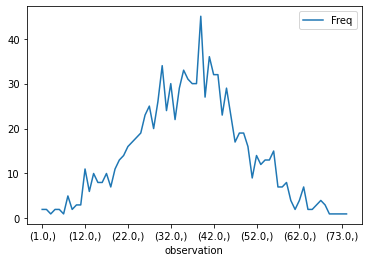

In [41]:
# your code here
ages = pd.read_csv("ages_population.csv")
FD1 = pd.DataFrame(ages.value_counts())
FD1.columns = ['Freq']
FD1 = FD1.sort_index(axis = 0)
display(FD1)
FD1.plot()

#My guess is, the mean will be somewhere below 40, and the Standard deviation somewhere around 15

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [44]:
# your code here

ages_mean = ages.mean()
print(ages_mean)
ages_std = ages['observation'].std()
print(ages_std)

observation    36.56
dtype: float64
12.816499625976762


In [20]:
"""
It was near, but not quite
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

,Freq
observation,
19.0,3
20.0,13
21.0,17
22.0,35
23.0,41
24.0,78
25.0,98
26.0,120
27.0,125


<AxesSubplot:xlabel='observation'>

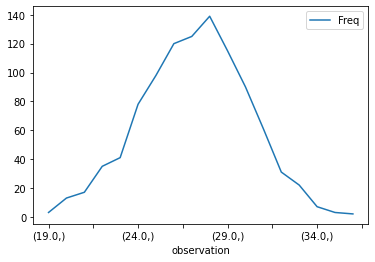

In [43]:
# your code here
ages2 = pd.read_csv("ages_population2.csv")
FD2 = pd.DataFrame(ages2.value_counts())
FD2.columns = ['Freq']
FD2 = FD2.sort_index(axis = 0)
display(FD2)
FD2.plot()


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [22]:
"""
The trend is the same but I can notice that the amount of values is quite different (higher in step 1)
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [46]:
ages2_mean = ages2.mean()
print(ages2_mean)
ages2_std = ages2['observation'].std()
print(ages2_std)

observation    27.155
dtype: float64
2.969813932689186


In [47]:
"""
The mean, as in the previous figure, is near the "peak" of the graphic. 
As expected, the standard deviation is way smaller since this dataset only covers 17 years in total, while the other covers 82
"""

'\nThe mean, as in the previous figure, is near the "peak" of the graphic. \nAs expected, the standard deviation is way smaller since this dataset only covers 17 years in total, while the other covers 82\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

,Freq
observation,
1.0,1
2.0,2
4.0,2
5.0,1
7.0,1
...,...
73.0,6
74.0,6
75.0,2


<AxesSubplot:xlabel='observation'>

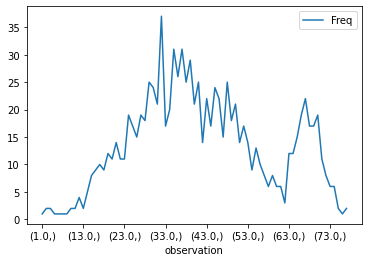

In [56]:

ages3 = pd.read_csv("ages_population3.csv")
FD3 = pd.DataFrame(ages3.value_counts())
FD3.columns = ['Freq']
FD3 = FD3.sort_index(axis = 0)
display(FD3)
FD3.plot()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [49]:
# your code here
ages3_mean = ages3.mean()
print(ages3_mean)
ages3_std = ages3['observation'].std()
print(ages3_std)

observation    41.989
dtype: float64
16.144705959865934


In [27]:
"""
Since we have a second "peak" between 63 and 73, the mean will be higher than the main "peak" around 33.
Also, it creates a wider standard deviation
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [51]:
print(ages3.quantile(0.25))
print(ages3.quantile(0.5))
print(ages3.quantile(0.75))

observation    30.0
Name: 0.25, dtype: float64
observation    40.0
Name: 0.5, dtype: float64
observation    53.0
Name: 0.75, dtype: float64


In [29]:
"""
the mean is bigger than the median, because as I said before, the peak of population between 63 and 73 disbalances the data.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [55]:
print(ages3.quantile(0.85))
print(ages3.quantile(0.15))
print(ages3.quantile(0.99))
print(ages3.quantile(0.01))

observation    64.0
Name: 0.85, dtype: float64
observation    25.0
Name: 0.15, dtype: float64
observation    74.0
Name: 0.99, dtype: float64
observation    10.0
Name: 0.01, dtype: float64


In [31]:
"""
Here we can see the disbalance: only 0,01% of the people is below 10, and 15% below 25.
On the other hand we can see that the theres a 15% of people over 64, and 0,01% over 74 (ending in 77)
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [32]:
# your code here

In [33]:
"""
your comments here
"""

'\nyour comments here\n'